In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# hämta data

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

# översikt på datan

In [4]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
print(X)
print()
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

[5 0 4 ... 4 5 6]


In [7]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

In [8]:
#skapa trännings data och test data. dela datan i mindre delar
X_train = X[:5000]
y_train = y[:5000]
X_val = X[5000:6000]
y_val = y[5000:6000]
X_test = X[6000:7000]
y_test = y[6000:7000]

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



In [10]:
count = pd.Series(y).value_counts()



print("Catgeory nollor = ", count[0])
print("Catgeory  ettor = ", count[1])
print("Catgeory  tvåor = ", count[2])
print("Catgeory treor = ", count[3])
print("Catgeory fyror = ", count[4])
print("Catgeory femmor = ", count[5])
print("Catgeory sexor = ", count[6])
print("Catgeory sjuor = ", count[7])
print("Catgeory åttor = ", count[8])
print("Catgeory nior = ", count[9])
print()


Catgeory nollor =  6903
Catgeory  ettor =  7877
Catgeory  tvåor =  6990
Catgeory treor =  7141
Catgeory fyror =  6824
Catgeory femmor =  6313
Catgeory sexor =  6876
Catgeory sjuor =  7293
Catgeory åttor =  6825
Catgeory nior =  6958



In [11]:

y[0]

5

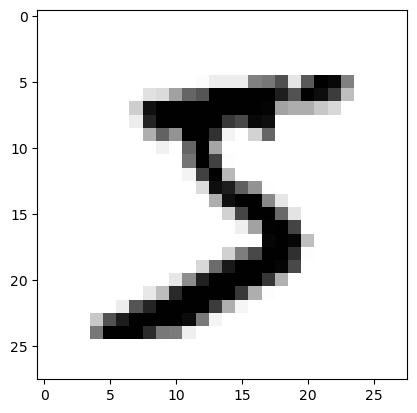

In [12]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
# plt.axis("off")

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(5000, 784)
(5000,)
(1000, 784)
(1000,)
(1000, 784)
(1000,)


In [14]:
# SVC

In [15]:
svm_clf=SVC(random_state=42)

In [16]:
svm_clf.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [17]:
y_pred_svm = svm_clf.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(svm_accuracy)

0.912


In [18]:
from sklearn.metrics import classification_report

In [19]:
print("accuracy score = ", svm_accuracy)
print()
print(f"Classification report for classifier {svm_clf}: \n"
     f"{classification_report(y_test, y_pred_svm)}\n")

accuracy score =  0.912

Classification report for classifier SVC(random_state=42): 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        99
           1       0.96      0.98      0.97       113
           2       0.89      0.85      0.87        94
           3       0.96      0.83      0.89       108
           4       0.93      0.94      0.93        93
           5       0.89      0.86      0.88        96
           6       0.91      0.96      0.93       101
           7       0.85      0.82      0.83       103
           8       0.94      0.92      0.93        99
           9       0.83      0.96      0.89        94

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000




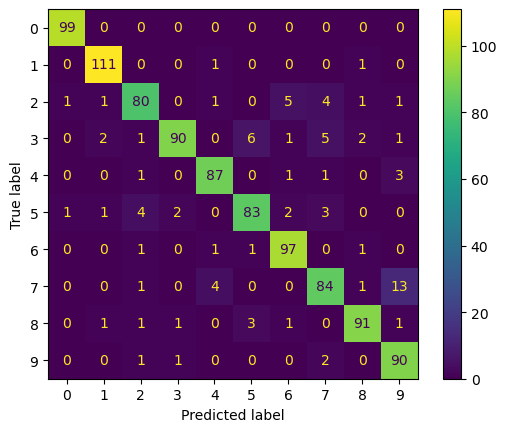

In [20]:
display_confusion_matrix(y_test, y_pred_svm)

In [21]:
#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [22]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [23]:
# Fit the model with your scaled training data
knn_clf.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=3)

In [24]:
# Predict on the test data
y_pred_knn = knn_clf.predict(X_test_scaled)


In [25]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy score =", knn_accuracy)
print()

Accuracy score = 0.874



In [26]:

print(f"Classification report for classifier {knn_clf}: \n"
      f"{classification_report(y_test, y_pred_knn)}\n")


Classification report for classifier KNeighborsClassifier(n_neighbors=3): 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        99
           1       0.87      0.99      0.93       113
           2       0.93      0.85      0.89        94
           3       0.86      0.77      0.81       108
           4       0.89      0.92      0.91        93
           5       0.89      0.83      0.86        96
           6       0.91      0.97      0.94       101
           7       0.93      0.69      0.79       103
           8       0.92      0.80      0.85        99
           9       0.72      0.91      0.81        94

    accuracy                           0.87      1000
   macro avg       0.88      0.87      0.87      1000
weighted avg       0.88      0.87      0.87      1000




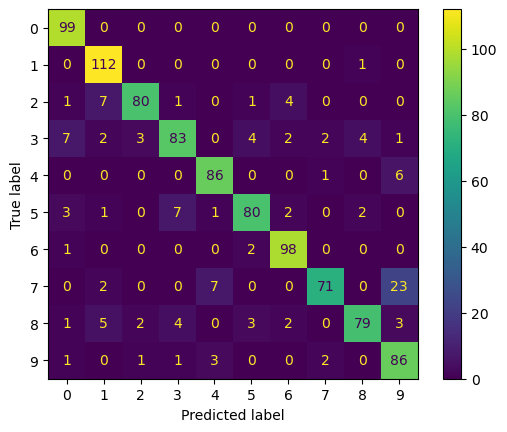

In [27]:
display_confusion_matrix(y_test, y_pred_knn)

In [28]:
#Gridsearch på alla två

In [29]:
k_neighbors_clf = KNeighborsClassifier(n_jobs= -1)
hyper_param_grid_knn_clf = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_cv_knn_clf = GridSearchCV(k_neighbors_clf, hyper_param_grid_knn_clf, n_jobs=-1)
grid_search_cv_knn_clf.fit(X_train, y_train) 

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [31]:
grid_search_cv_knn_clf.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

In [32]:
grid_search_cv_knn_clf.best_score_

0.9342

In [33]:
svm_clf=SVC(random_state=42)

In [34]:
param_grid_svm =[
    {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'], 'gamma':[0.0, 0.5, 1, 2], 'C':[0.1, 0.5, 1, 1.5, 2]}
]

grid_search_svm = GridSearchCV(svm_clf, param_grid_svm)

In [ ]:
grid_search_svm.fit(X_train_scaled, y_train)

In [ ]:
y_pred_grid_svm = grid_search_svm.predict(X_test_scaled)
svm_grid_accuracy= accuracy_score(y_test, y_pred_grid_svm)
print(svm_grid_accuracy)


In [47]:
grid_search_svm.best_params_

{'C': 0.1, 'gamma': 0.5, 'kernel': 'poly'}

In [48]:
print("accuracy score = ", svm_grid_accuracy)
print()
print(f"Classification report for classifier {grid_search_svm}: \n" 
     f"{classification_report(y_test, y_pred_grid_svm)}\n")

accuracy score =  0.939

Classification report for classifier GridSearchCV(estimator=SVC(random_state=42),
             param_grid=[{'C': [0.1, 0.5, 1, 1.5, 2], 'gamma': [0.0, 0.5, 1, 2],
                          'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}]): 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        99
           1       0.98      0.98      0.98       113
           2       0.97      0.91      0.94        94
           3       0.99      0.88      0.93       108
           4       0.95      0.99      0.97        93
           5       0.96      0.95      0.95        96
           6       0.95      0.99      0.97       101
           7       0.96      0.80      0.87       103
           8       0.89      0.94      0.91        99
           9       0.80      0.97      0.88        94

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0

# The KNeighborsClassifier hade the bättre accuracy score

# Testa hela databaset

In [30]:
X.shape

(70000, 784)

In [31]:
y.shape

(70000,)

In [32]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:70000]
y_test = y[60000:70000]


In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [34]:
import joblib

In [35]:
joblib.dump(grid_search_cv_knn_clf, r"C:\Users\Admin\Desktop\ML_model.pkl")

['C:\\Users\\Admin\\Desktop\\ML_model.pkl']

In [36]:
knn_clf = joblib.load(r"C:\Users\Admin\Desktop\ML_model.pkl")

knn_clf.score(X_test, y_test)

0.9379

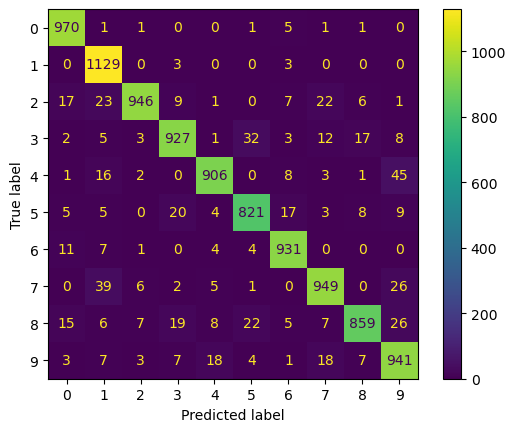

In [38]:
display_confusion_matrix(y_test, y_pred)

In [39]:
print(y[10:100])

[3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6 0 7 6 1 8 7 9 3 9 8
 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6 3 0 2 1 1 7 9 0 2 6
 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


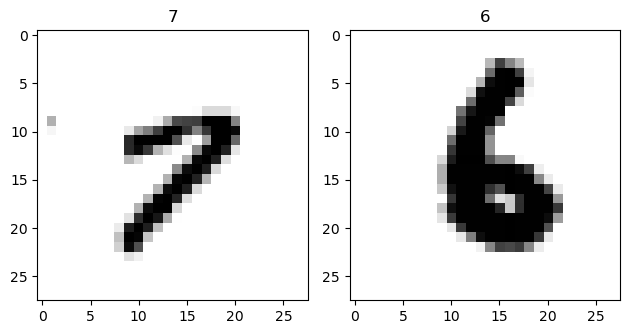

In [54]:

some_digit = X[29]
some_digit_image = some_digit.reshape(28, 28)


some_digit_2 = X[36]
some_digit_image_2 = some_digit_2.reshape(28, 28)

# Create a figure and two subplots side by side
fig, axes = plt.subplots(1, 2)


axes[0].imshow(some_digit_image, cmap=mpl.cm.binary)
axes[0].set_title("7")


axes[1].imshow(some_digit_image_2, cmap=mpl.cm.binary)
axes[1].set_title("6")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
pip install matplotlib
pip install streamlit
pip install pandas
pip install numpy
pip install opencv-python
pip install streamlit-drawable-canvas


In [58]:
pip install streamlit


  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/9b/ea/7219c01b5e92d02d2bc994a36245d99331cd66eb12d284707a2060a013d0/streamlit-1.32.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/c5/e4/7fcceef127badbb0d644d730d992410e4f3799b295c9964a172f92a469c7/altair-5.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/fa/2a/7f3714cbc6356a0efec525ce7a0613d581072ed6eb53eb7b9754f33db807/blinker-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/fb/2b/a64c2d25a37aeb921fddb929111413049fc5f8b9a4c1aefaffaafe768d54/cachetools-5.3.3-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf<5,>=3.20 from https://files.pythonhosted.org/packages/ad/6e/1bed3b7c904cc178cb8ee8dbaf72934964452b3de95b7a63412591ed

In [59]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.6 MB 21.8 MB/s eta 0:00:02
   -- ------------------------------------- 2.2/38.6 MB 23.5 MB/s eta 0:00:02
   --- ------------------------------------ 3.4/38.6 MB 24.0 MB/s eta 0:00:02
   ---- ----------------------------------- 4.4/38.6 MB 23.3 MB/s eta 0:00:02
   ----- ---------------------------------- 5.4/38.6 MB 23.0 MB/s eta 0:00:02
   ------ --------------------------------- 6.5/38.6 MB 22.9 MB/s eta 0:00:02
   -------- ------------------------------- 7.8/38.6 MB 23.5 MB/s eta 0:00:02
   --------- ------------------------------ 9.0/38.6 MB 23.9 MB/s eta 0:00:02
   ---------- ----------------------------- 10.1/38.6 MB 24.0 MB/s eta 0:00:02
   ---

In [60]:
pip install streamlit-drawable-canvas

  Obtaining dependency information for streamlit-drawable-canvas from https://files.pythonhosted.org/packages/d6/87/bc94460ec77d824735da56fe8e321baf0692595c2a8a90b55f6908a5edc4/streamlit_drawable_canvas-0.9.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------- ----------------- 0.6/1.2 MB 20.5 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 14.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [66]:
import cv2
import numpy as np

In [70]:


# Correct the file path
image_path = r"C:\Users\Admin\Pictures\Saved Pictures\Camera Roll\WIN_20240321_11_30_00_Pro.jpg"

# Load the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if image is None:
    print(f"Failed to load image from {image_path}")
else:
    # Resize, normalize, and flatten the image
    image = cv2.resize(image, (28, 28))
    image = image.astype('float32') / 255.0
    image = image.flatten()  # Flatten the image to a 1D array


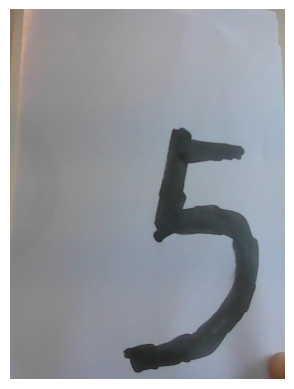

In [81]:
image_path = r"C:\Users\Admin\Pictures\Saved Pictures\Camera Roll\WIN_20240321_11_30_00_Pro.jpg"
# Load the image
image = cv2.imread(image_path)

# Display the image
if image is not None:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis numbers
    plt.show()
else:
    print("Failed to load the image.")

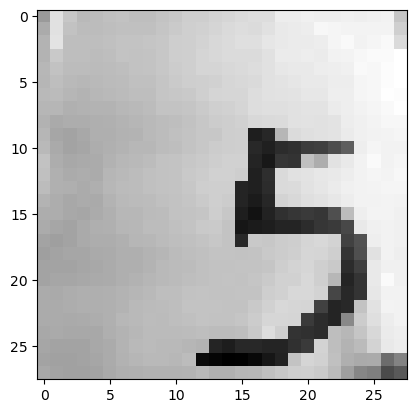

In [73]:


# Check if the image is loaded and processed correctly
if image is not None and image.shape == (784,):
    # Reshape the image back to 2D for display
    image_2d = image.reshape(28, 28)
    plt.imshow(image_2d, cmap='gray')
    plt.show()
else:
    print("The image is not loaded or processed correctly.")


In [74]:
image_path = r"C:\Users\Admin\Pictures\Saved Pictures\Camera Roll\WIN_20240321_11_29_48_Pro.jpg"

# Load the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if image is None:
    print(f"Failed to load image from {image_path}")
else:
    # Resize, normalize, and flatten the image
    image = cv2.resize(image, (28, 28))
    image = image.astype('float32') / 255.0
    image = image.flatten()  # Flatten the image to a 1D array

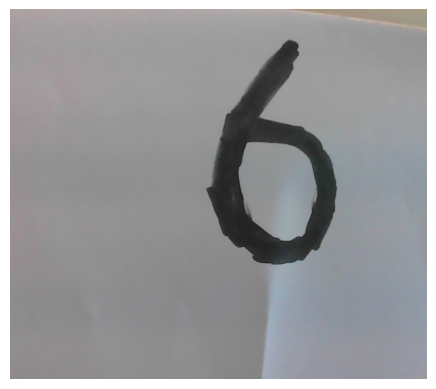

In [80]:
# Replace with your image file path
image_path = r"C:\Users\Admin\Pictures\Saved Pictures\Camera Roll\WIN_20240321_11_29_48_Pro.jpg"
# Load the image
image = cv2.imread(image_path)

# Display the image
if image is not None:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis numbers
    plt.show()
else:
    print("Failed to load the image.")

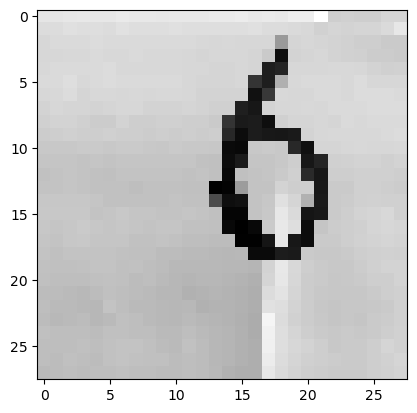

In [75]:

# Check if the image is loaded and processed correctly
if image is not None and image.shape == (784,):
    # Reshape the image back to 2D for display
    image_2d = image.reshape(28, 28)
    plt.imshow(image_2d, cmap='gray')
    plt.show()
else:
    print("The image is not loaded or processed correctly.")

In [77]:
image_path = r"C:\Users\Admin\Pictures\Saved Pictures\Camera Roll\WIN_20240321_11_28_14_Pro.jpg"

# Load the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if image is None:
    print(f"Failed to load image from {image_path}")
else:
    # Resize, normalize, and flatten the image
    image = cv2.resize(image, (28, 28))
    image = image.astype('float32') / 255.0
    image = image.flatten()  # Flatten the image to a 1D array

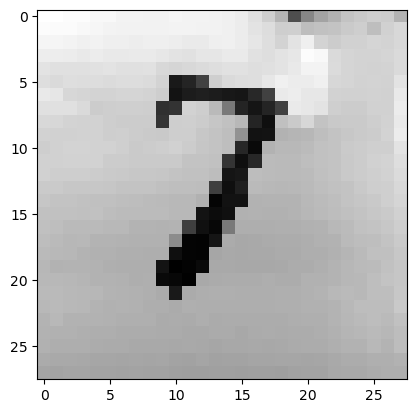

In [78]:

# Check if the image is loaded and processed correctly
if image is not None and image.shape == (784,):
    # Reshape the image back to 2D for display
    image_2d = image.reshape(28, 28)
    plt.imshow(image_2d, cmap='gray')
    plt.show()
else:
    print("The image is not loaded or processed correctly.")